In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
import seaborn as sns
import bokeh as bk
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("gr5regression.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
len(data.Country.unique())

193

In [16]:
for column in data.columns:
    print(f"{column} size is {len(data[column].unique())}")

Country size is 193
Year size is 16
Status size is 2
Life expectancy  size is 363
Adult Mortality size is 426
infant deaths size is 209
Alcohol size is 1077
percentage expenditure size is 2328
Hepatitis B size is 88
Measles  size is 958
 BMI  size is 609
under-five deaths  size is 252
Polio size is 74
Total expenditure size is 819
Diphtheria  size is 82
 HIV/AIDS size is 200
GDP size is 2491
Population size is 2279
 thinness  1-19 years size is 201
 thinness 5-9 years size is 208
Income composition of resources size is 626
Schooling size is 174


In [38]:
discrete_columns = ["Country", "Year", "Status"]
continuous_columns = [column for column in data.columns if column not in discrete_columns]
print(continuous_columns)

['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [22]:
deps_on_life_expectancy=["Country", "Year", "Adult Mortality", "infant deaths", "Alcohol", "Herpatitis B", "Measles", "BMI", "under-five deaths", "Polio", "Total expenditure", "Diphteria", "HIV/AIDS",
                         " thinness 1-19 years", ' thinnerss 5-9 years, "Income composition of resources', "Schooling"]
per_exp_size = ["percentage expenditure"]


In [93]:
# data.Country.describe()
# data.Alcohol.value_counts()
# data["Life expectancy "].value_counts()
# data["GDP"].value_counts()
# data["Income composition of resources"].value_counts()
# data["Schooling"].value_counts()
# data["percentage expenditure"].value_counts()
# data[" BMI "].value_counts()
data["Polio"].value_counts()
# data["Total expenditure"].value_counts()
# data[" HIV/AIDS"].value_counts()
# data[" thinness  1-19 years"].value_counts()
# data[" "]

99.0    376
98.0    255
96.0    207
97.0    205
95.0    180
       ... 
48.0      2
39.0      2
23.0      1
17.0      1
33.0      1
Name: Polio, Length: 73, dtype: int64

In [94]:
# find any null values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [35]:
data.Population.isnull().sum()

652

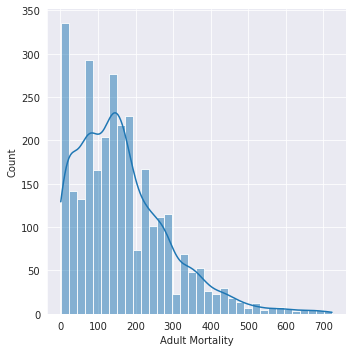

In [43]:
sns.displot(data["Adult Mortality"], kde=True)

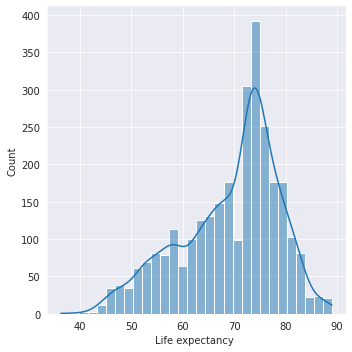

In [45]:
sns.displot(data["Life expectancy "], kde=True)

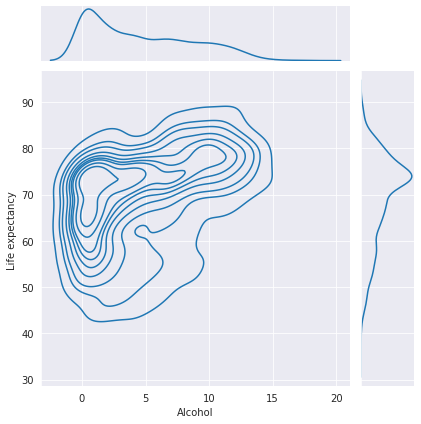

In [47]:
sns.jointplot(x="Alcohol", y="Life expectancy ", data=data, kind="kde")

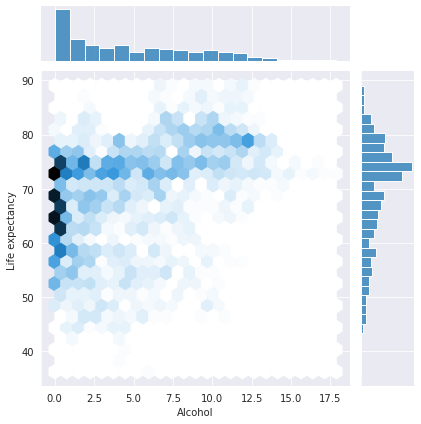

In [48]:
sns.jointplot(x="Alcohol", y="Life expectancy ", data=data, kind="hex")

<AxesSubplot:>

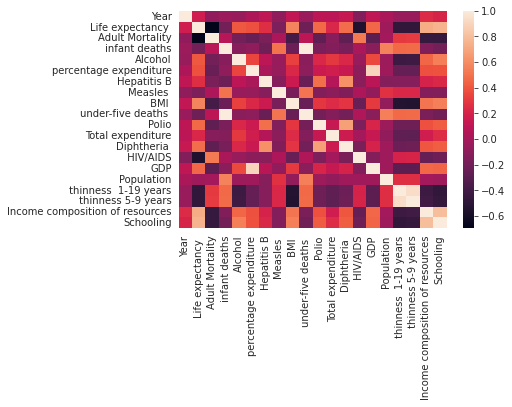

In [49]:
sns.heatmap(data.corr())

In [61]:
data.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [51]:
dir(data.corr())

['Alcohol',
 'GDP',
 'Polio',
 'Population',
 'Schooling',
 'T',
 'Year',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand

In [58]:
data.corr().Alcohol

-0.05298977742447831

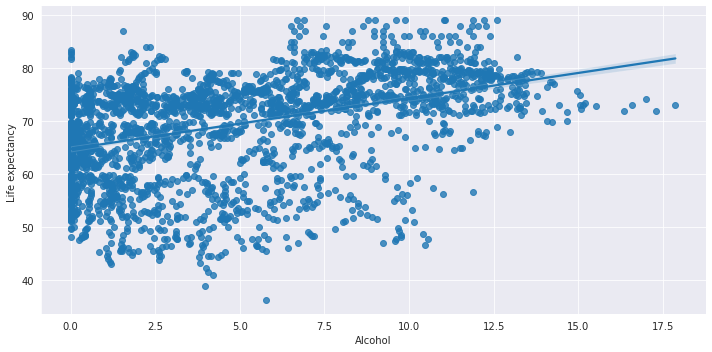

In [66]:
sns.lmplot(x="Alcohol", y="Life expectancy ", aspect=2, data=data)

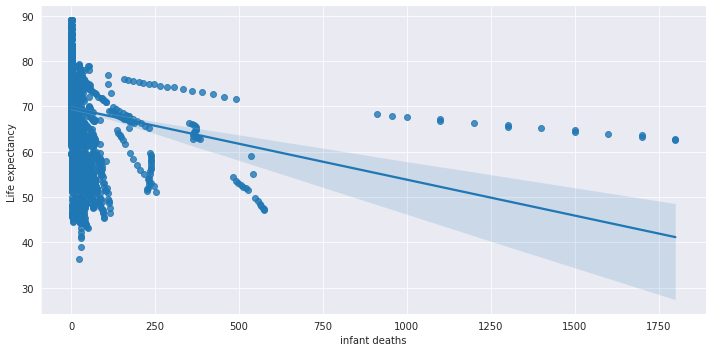

In [68]:
sns.lmplot(x="infant deaths", y="Life expectancy ", aspect=2, data=data)

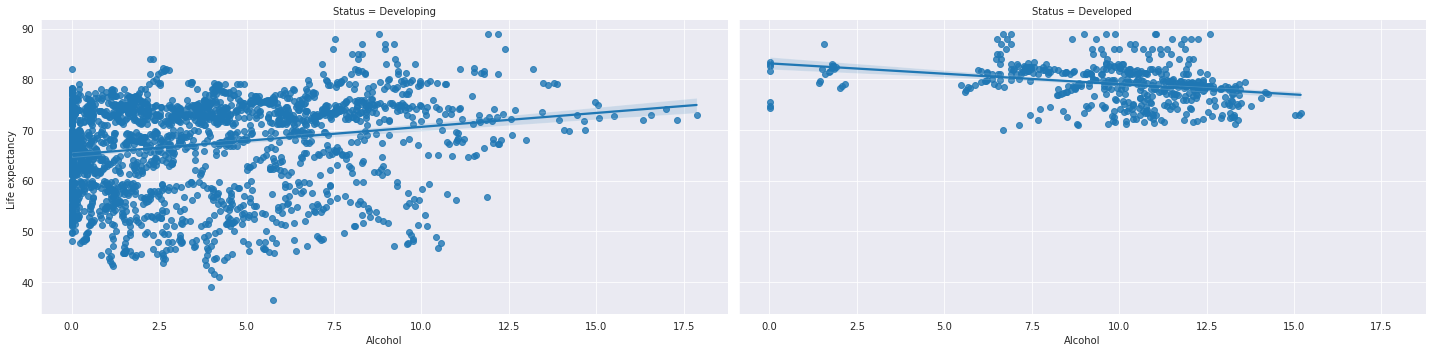

In [78]:
sns.lmplot(x="Alcohol", y="Life expectancy ", aspect=2, col="Status",data=data)

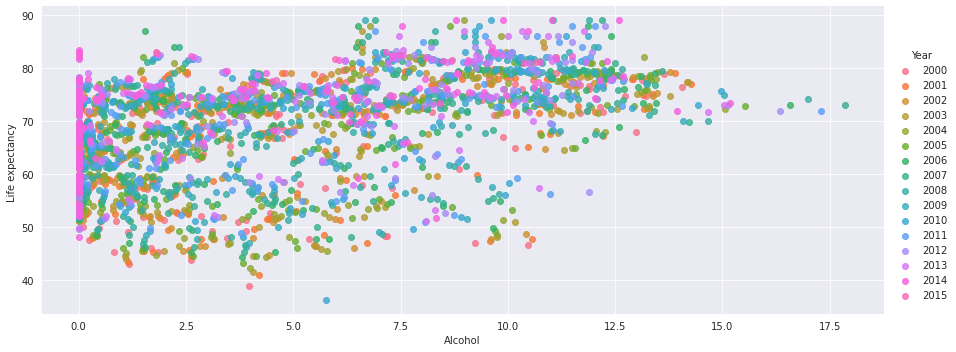

In [75]:
sns.lmplot(x="Alcohol", y="Life expectancy ", aspect=2.5, hue="Year",data=data, fit_reg=False)

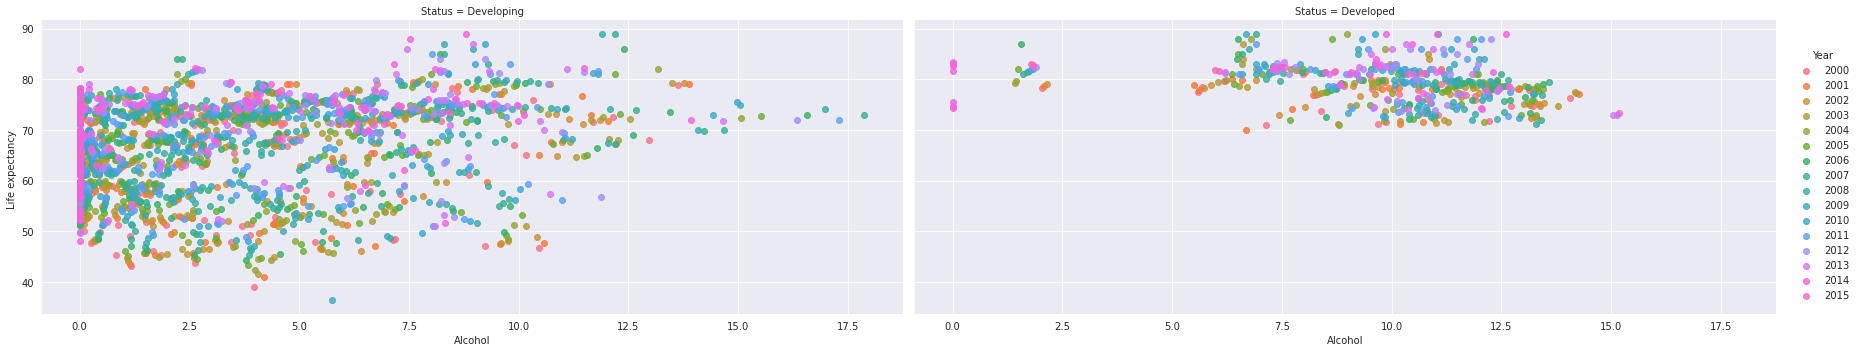

In [76]:
sns.lmplot(x="Alcohol", y="Life expectancy ", aspect=2.5, hue="Year",data=data, col="Status", fit_reg=False)

<AxesSubplot:xlabel='Year', ylabel='count'>

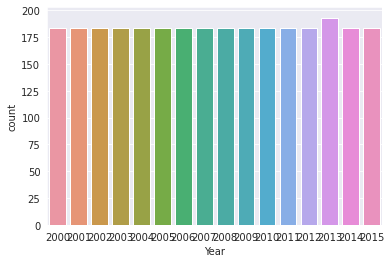

In [79]:
sns.countplot(x="Year", data=data)

<AxesSubplot:xlabel='Status', ylabel='count'>

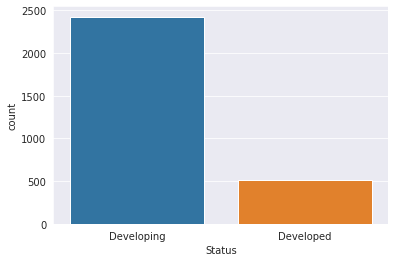

In [80]:
sns.countplot(x="Status", data=data)

<AxesSubplot:xlabel='Year', ylabel='Life expectancy '>

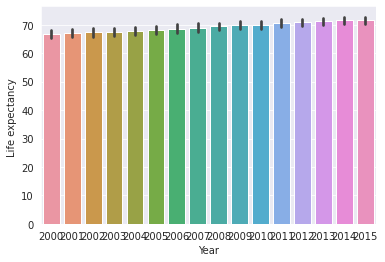

In [100]:
sns.barplot(x="Year", y="Life expectancy ",data=data, estimator=np.mean)

<AxesSubplot:xlabel='Status', ylabel='Life expectancy '>

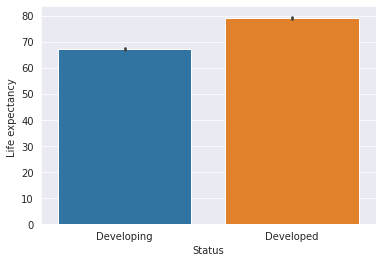

In [101]:
sns.barplot(x="Status", y="Life expectancy ",data=data, estimator=np.mean)

TypeError: boxplot() got an unexpected keyword argument 'aspect'

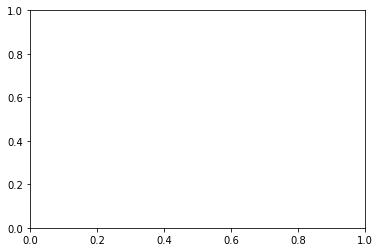

In [5]:
sns.boxplot(x="Adult Mortality", data=data)

<AxesSubplot:xlabel='Alcohol'>

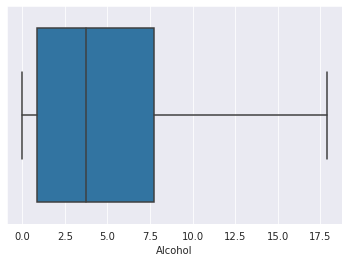

In [104]:
sns.boxplot(x="Alcohol", data=data)

<AxesSubplot:xlabel='Polio'>

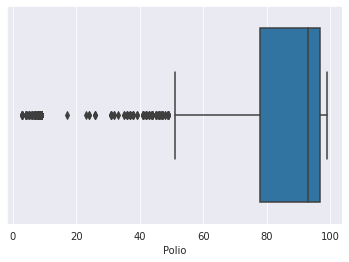

In [105]:
sns.boxplot(x="Alcohol", data=data)

<AxesSubplot:xlabel='Status', ylabel='Life expectancy '>

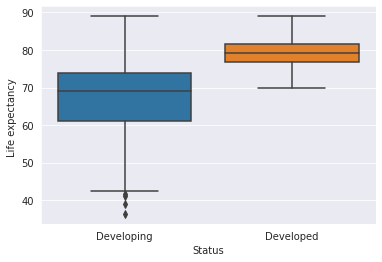

In [106]:
sns.boxplot(y="Life expectancy ", x="Status", data=data)